In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv(r"train_employee_attrition.csv")

In [5]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [6]:
df.describe().T # T for table format for better observation

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


In [7]:
df.shape

(1677, 35)

In [8]:
df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [10]:
df.select_dtypes(include=np.object).columns

C:\Users\VibeX\AppData\Local\Temp\ipykernel_6608\1160358068.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.select_dtypes(include=np.object).columns


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [11]:
# Unique values and value count of Categorical features 
for x in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']:
    print(f"Unique values in {x} column are: \n{df[x].value_counts()}")
    print('\n')

Unique values in BusinessTravel column are: 
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64


Unique values in Department column are: 
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64


Unique values in EducationField column are: 
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64


Unique values in Gender column are: 
Male      1064
Female     613
Name: Gender, dtype: int64


Unique values in JobRole column are: 
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources               34
Name: JobRole, d

In [12]:
df['id'].value_counts()

0       1
1153    1
1125    1
1124    1
1123    1
       ..
556     1
555     1
554     1
553     1
1676    1
Name: id, Length: 1677, dtype: int64

In [13]:
# Over18 column have only Y value so we can drop the column
# We can also drop ID column as it is represting id only

In [14]:
df.drop(['id','Over18'],axis=1,inplace=True)

In [15]:
df.shape

(1677, 33)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EmployeeCount             1677 non-null   int64 
 8   EnvironmentSatisfaction   1677 non-null   int64 
 9   Gender                    1677 non-null   object
 10  HourlyRate                1677 non-null   int64 
 11  JobInvolvement            1677 non-null   int64 
 12  JobLevel                  1677 non-null   int64 
 13  JobRole                   1677 non-null   object
 14  JobSatisfaction         

In [17]:
df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [18]:
# Min and Max value of Numerical columns
for x in ['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction',  'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']:
    
    print(f"Min value of {x} columns: {df[x].min()}, Max value of {x} columns: {df[x].max()}\n")
    

Min value of Age columns: 18, Max value of Age columns: 60

Min value of DailyRate columns: 107, Max value of DailyRate columns: 3921

Min value of DistanceFromHome columns: 1, Max value of DistanceFromHome columns: 29

Min value of Education columns: 1, Max value of Education columns: 15

Min value of EmployeeCount columns: 1, Max value of EmployeeCount columns: 1

Min value of EnvironmentSatisfaction columns: 1, Max value of EnvironmentSatisfaction columns: 4

Min value of HourlyRate columns: 30, Max value of HourlyRate columns: 100

Min value of JobInvolvement columns: 1, Max value of JobInvolvement columns: 4

Min value of JobLevel columns: 1, Max value of JobLevel columns: 7

Min value of JobSatisfaction columns: 1, Max value of JobSatisfaction columns: 4

Min value of MonthlyIncome columns: 1010, Max value of MonthlyIncome columns: 19973

Min value of MonthlyRate columns: 636, Max value of MonthlyRate columns: 26999

Min value of NumCompaniesWorked columns: 0, Max value of NumCom

In [19]:
df['EmployeeCount'].value_counts(), df['StandardHours'].value_counts()

(1    1677
 Name: EmployeeCount, dtype: int64,
 80    1677
 Name: StandardHours, dtype: int64)

In [20]:
# StandardHours and EmployeeCount features have a single value so we can drop the columns
df.drop(['StandardHours','EmployeeCount'],axis=1,inplace=True)

In [21]:
df.shape

(1677, 31)

In [22]:
# Finding Null values
df.isna().sum()   

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

# Data Visualization

In [23]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,...,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,...,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,...,3,0,31,0,3,31,14,4,10,1


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

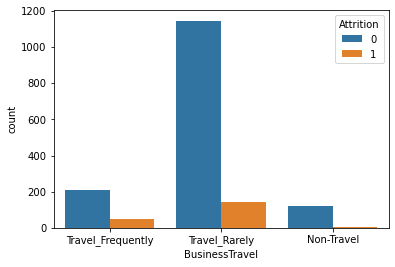

In [24]:
sns.countplot('BusinessTravel',hue='Attrition',data=df)

In [25]:
a=df[(df['BusinessTravel'] == 'Travel_Frequently') ]
a

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
8,51,Travel_Frequently,1297,Sales,6,3,Life Sciences,4,Male,43,...,1,1,18,3,3,16,14,4,9,0
15,39,Travel_Frequently,640,Research & Development,25,4,Medical,1,Male,81,...,3,0,20,2,2,20,9,6,10,0
24,29,Travel_Frequently,746,Sales,18,3,Life Sciences,2,Female,62,...,4,0,5,2,2,5,3,1,2,1
26,35,Travel_Frequently,796,Sales,10,4,Marketing,2,Male,37,...,4,1,2,2,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,36,Travel_Frequently,1490,Research & Development,15,2,Life Sciences,1,Male,37,...,1,1,10,2,3,10,9,7,8,0
1644,31,Travel_Frequently,878,Sales,5,3,Life Sciences,4,Male,55,...,3,1,7,3,4,3,2,0,2,0
1662,27,Travel_Frequently,992,Research & Development,7,3,Life Sciences,1,Female,99,...,4,2,0,2,3,0,0,0,0,0
1663,31,Travel_Frequently,334,Research & Development,1,1,Medical,1,Female,34,...,3,0,9,6,2,9,8,7,6,0


In [26]:
df['Attrition'].value_counts()

0    1477
1     200
Name: Attrition, dtype: int64

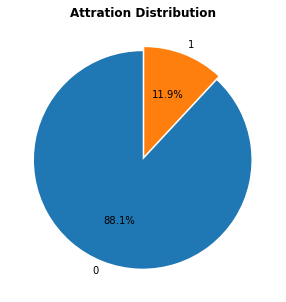

In [27]:
plt.figure(figsize=(5,5))
plt.title('Attration Distribution',fontweight='bold',loc='center')
labels=df["Attrition"].value_counts().index
plt.pie(x=df['Attrition'].value_counts(),explode=[0.01,0.03],autopct='%1.1f%%',labels=labels,startangle=90)
#plt.legend(['Yes','No'])
plt.show()

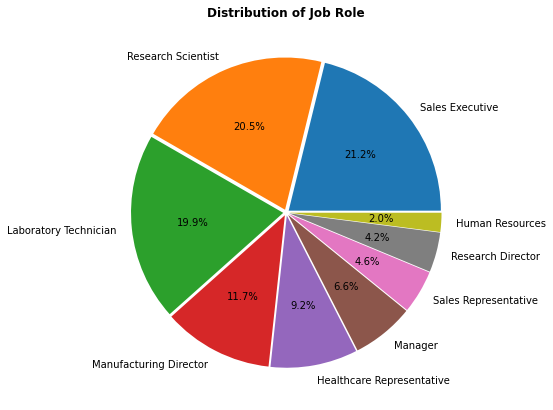

In [28]:
plt.figure(figsize=(10,7))
labels=df['JobRole'].value_counts().index
plt.title('Distribution of Job Role',fontweight='bold')
exp=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]
plt.pie(x=df['JobRole'].value_counts(),explode=exp,autopct='%1.1f%%',labels=labels)
plt.show()

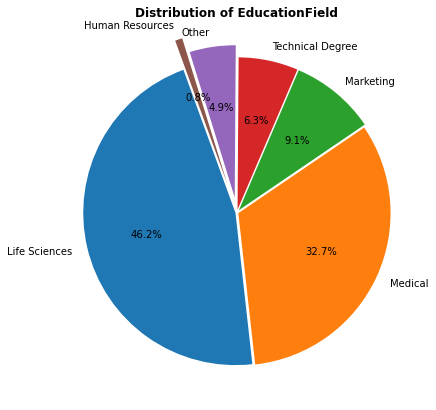

In [29]:
plt.figure(figsize=(10,7))
labels=df['EducationField'].value_counts().index
plt.title('Distribution of EducationField',fontweight='bold')
exp=[0.01,0.01,0.02,0.02,0.1,0.2]
plt.pie(x=df['EducationField'].value_counts(),explode=exp,autopct='%1.1f%%',labels=labels,startangle=110)
plt.show()

<AxesSubplot:>

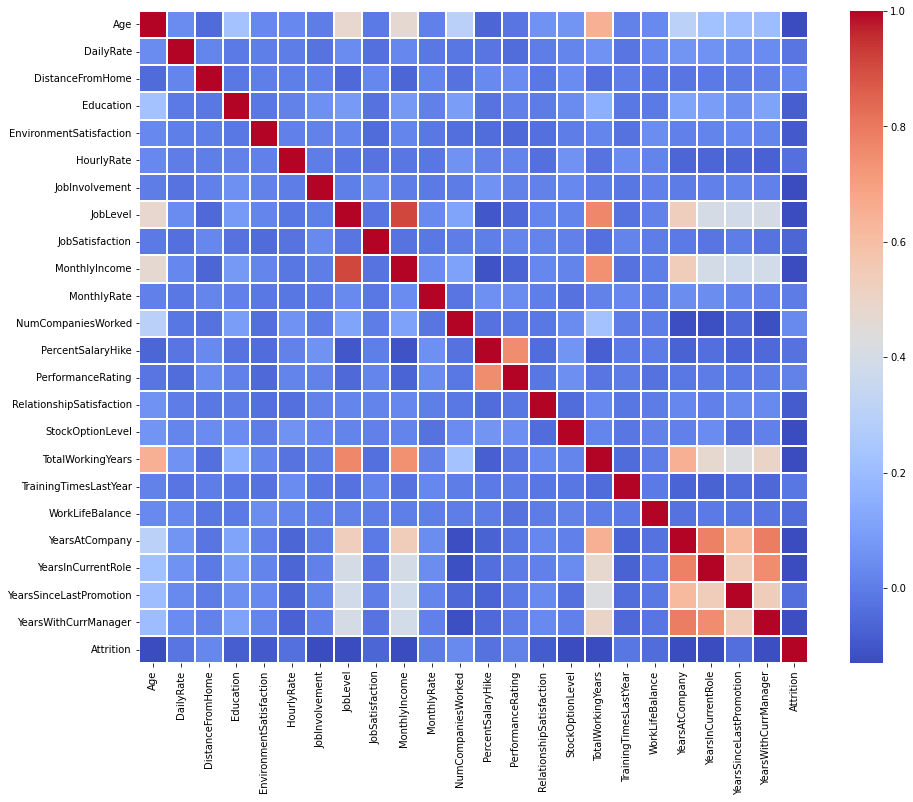

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='coolwarm',linewidth=1.5,robust=True) #robust -> increases clearity 

<AxesSubplot:>

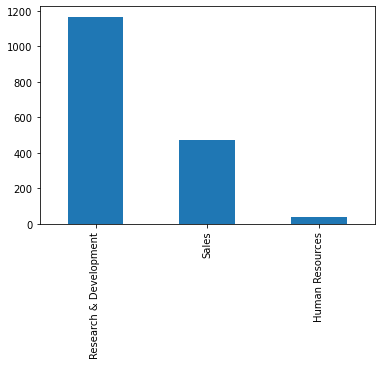

In [31]:
df.Department.value_counts().plot(kind='bar')

<AxesSubplot:>

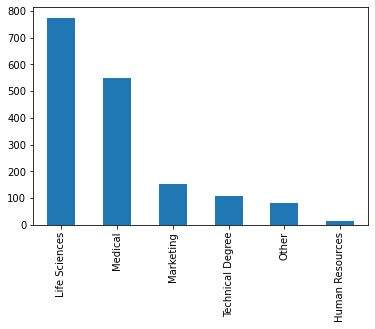

In [32]:
df.EducationField.value_counts().plot(kind='bar')

In [33]:
df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,4,1,4,3,3,4,2,0,3,0


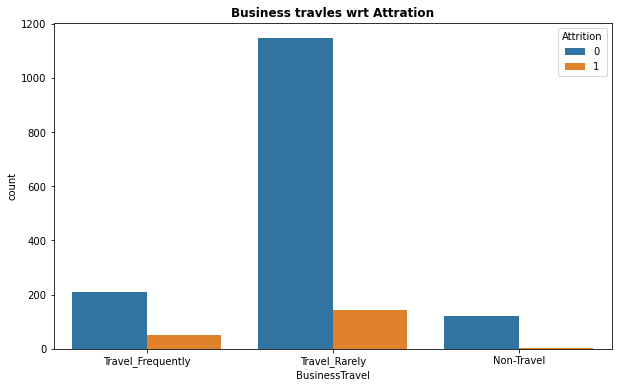

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')
plt.title("Business travles wrt Attration",fontweight='bold')
plt.show()
# We can conclude that if you travel rarely then attrition chances are less as 0-> No attration

In [35]:
x=['Travel_Frequently','Travel_Rarely','Non-Travel']
for i in x:
    attr_emp=df[(df['BusinessTravel']==i) & (df['Attrition']==0)].shape[0]
    no_of_emp = df[df['BusinessTravel'] == i].shape[0]
    perc=round(attr_emp/no_of_emp,2)
    print(f'Total number of employees in {i} department is',no_of_emp)
    print(f"{perc*100}% of Employees have attrited from {i} department\n")

Total number of employees in Travel_Frequently department is 261
80.0% of Employees have attrited from Travel_Frequently department

Total number of employees in Travel_Rarely department is 1290
89.0% of Employees have attrited from Travel_Rarely department

Total number of employees in Non-Travel department is 126
96.0% of Employees have attrited from Non-Travel department



In [36]:
df['Department'].value_counts()

Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64

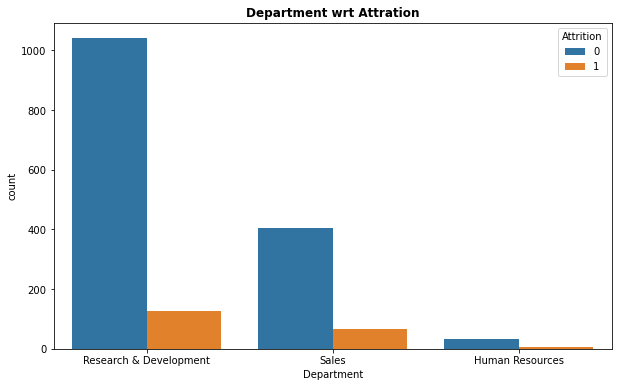

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue='Attrition',data=df)
plt.title('Department wrt Attration',fontweight='bold')
plt.show()
# We can say that people from Reasech and Development are mostly attriated 

In [38]:
x=['Research & Development','Sales','Human Resources']
for i in x:
    attr_emp=df[(df['Department']==i) & (df['Attrition']==0)].shape[0]
    no_of_emp = df[df['Department'] == i].shape[0]
    perc=round(attr_emp/no_of_emp,2)
    print(f'Total number of employees in {i} department is',no_of_emp)
    print(f"{perc*100}% of Employees have attrited from {i} department\n")

Total number of employees in Research & Development department is 1167
89.0% of Employees have attrited from Research & Development department

Total number of employees in Sales department is 471
86.0% of Employees have attrited from Sales department

Total number of employees in Human Resources department is 39
82.0% of Employees have attrited from Human Resources department



C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\si

<AxesSubplot:xlabel='EducationField', ylabel='count'>

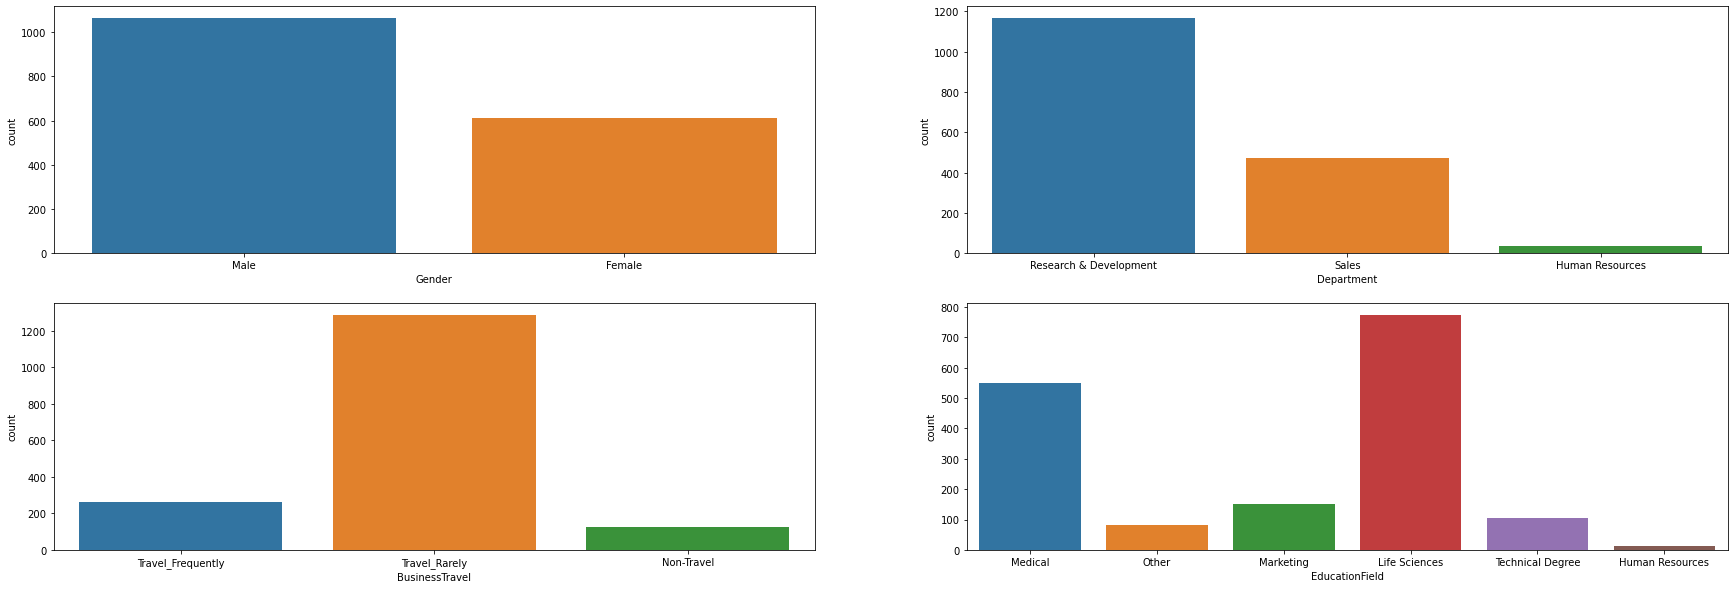

In [39]:
# Categorical Data Distribution
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
sns.countplot('Gender',data=df,ax=axs[0,0])
sns.countplot('Department',data=df,ax=axs[0,1])
sns.countplot('BusinessTravel',data=df,ax=axs[1,0])
sns.countplot('EducationField',data=df,ax=axs[1,1])

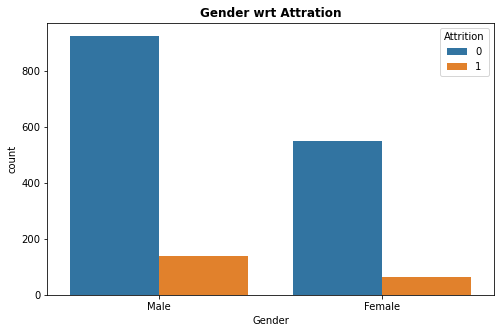

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Gender wrt Attration',fontweight='bold')
plt.show()


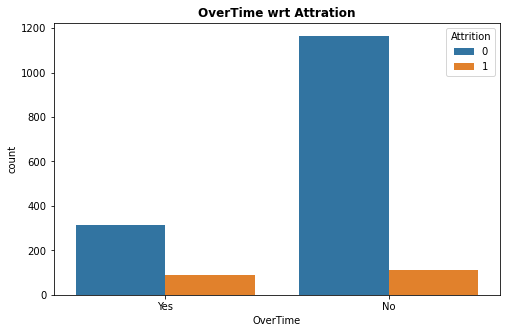

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.title('OverTime wrt Attration',fontweight='bold')
plt.show()

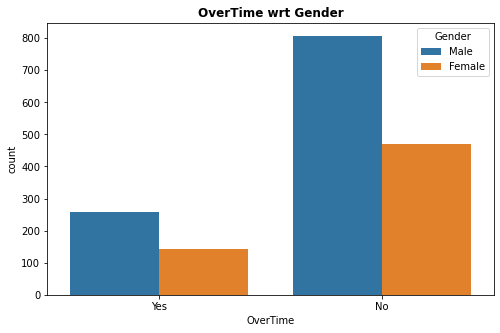

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime',hue='Gender',data=df)
plt.title('OverTime wrt Gender',fontweight='bold')
plt.show()

['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction',  'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

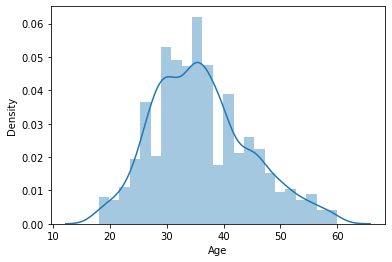

In [43]:
#Numerical features
sns.distplot(df['Age'])

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(6196.049493142516, 4834.0)

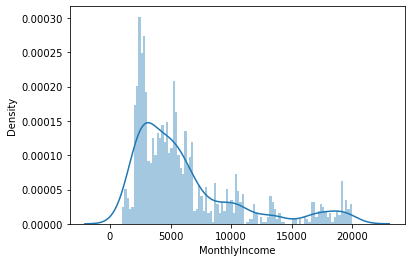

In [44]:
sns.distplot(df['MonthlyIncome'],bins=100)
# When mean > median -> left skewed dist plot
df['MonthlyIncome'].mean(),df['MonthlyIncome'].median()

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

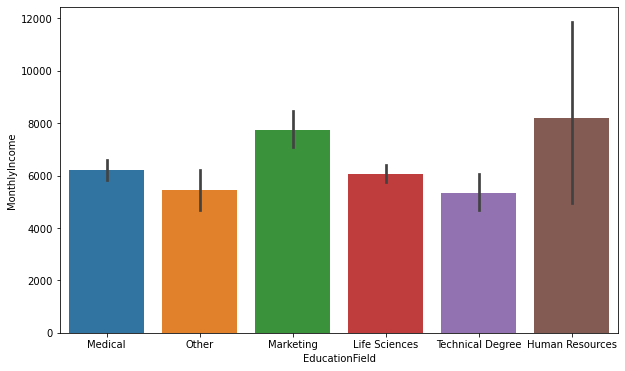

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='EducationField',y='MonthlyIncome',data=df)


<AxesSubplot:xlabel='EducationField', ylabel='count'>

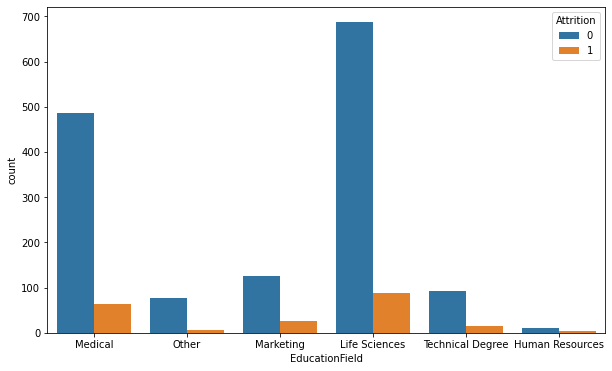

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='EducationField',hue='Attrition',data=df)
# People with Life Science and Medical education are attritioned more as compared to others

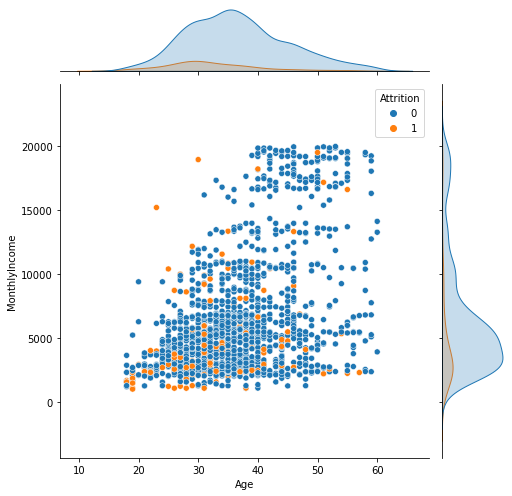

In [47]:
# Age vs MonthlyIncome
sns.jointplot(x='Age',y='MonthlyIncome',hue='Attrition',data=df,height=7) # Height -> to increase size of plot

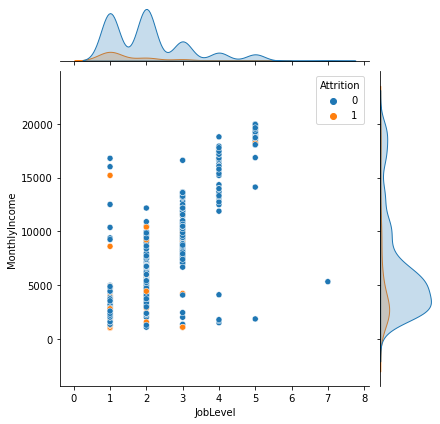

In [48]:
# JL vs MonthlyIncomeb
sns.jointplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',data=df,kind='scatter')

# we dont have any record with JL 6 and 1 record with JL 7

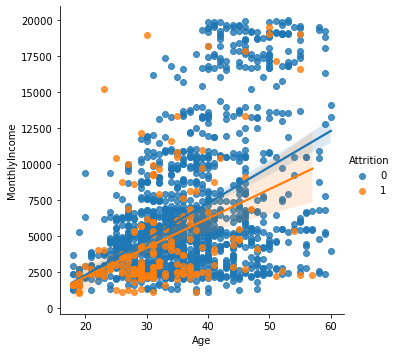

In [49]:
sns.lmplot(x='Age',y='MonthlyIncome',hue='Attrition',data=df)
# age < 40 and monthly_income<75000 are mostly arritioned 

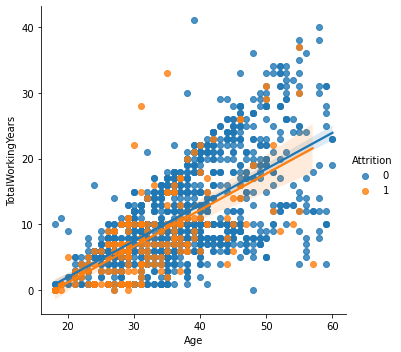

In [50]:
sns.lmplot(x='Age',y='TotalWorkingYears',hue='Attrition',data=df)
# age < 40 and total_working_years<20 are mostly arritioned 

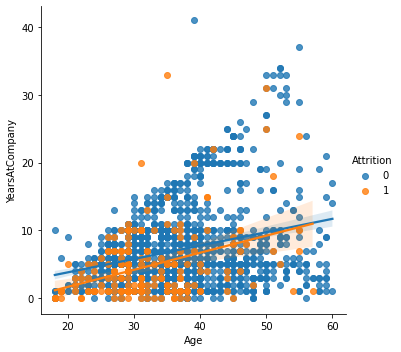

In [51]:
sns.lmplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)
# People who completed less than 10yrs at company and aged below 40 are mostly not attritioned
# We can say that people in early stage of joining are not attritioned

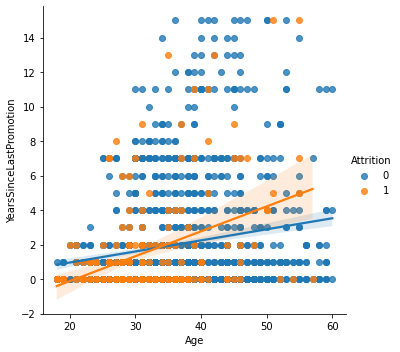

In [52]:
sns.lmplot(x='Age',y='YearsSinceLastPromotion',hue='Attrition',data=df)
# people who recently got promoted are not attritioned 
# People are mostly attritioned who didnt get promotion from last 2 years

In [53]:
df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,4,1,4,3,3,4,2,0,3,0


# Data Preprocessing

In [54]:
#encode binary variables
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [55]:
enc = LabelEncoder()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EnvironmentSatisfaction   1677 non-null   int64 
 8   Gender                    1677 non-null   int64 
 9   HourlyRate                1677 non-null   int64 
 10  JobInvolvement            1677 non-null   int64 
 11  JobLevel                  1677 non-null   int64 
 12  JobRole                   1677 non-null   object
 13  JobSatisfaction           1677 non-null   int64 
 14  MaritalStatus           

In [57]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,0,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,0,46,...,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,0,80,...,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,1,40,...,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,1,37,...,3,0,31,0,3,31,14,4,10,1


In [58]:
# Encoding categorical column using labelEncoding 
df['BusinessTravel'] = enc.fit_transform(df['BusinessTravel'])
df['Department'] = enc.fit_transform(df['Department'])
df['EducationField'] = enc.fit_transform(df['EducationField'])
df['MaritalStatus'] = enc.fit_transform(df['MaritalStatus'])
df['JobRole'] = enc.fit_transform(df['JobRole'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1677 non-null   int64
 1   BusinessTravel            1677 non-null   int32
 2   DailyRate                 1677 non-null   int64
 3   Department                1677 non-null   int32
 4   DistanceFromHome          1677 non-null   int64
 5   Education                 1677 non-null   int64
 6   EducationField            1677 non-null   int32
 7   EnvironmentSatisfaction   1677 non-null   int64
 8   Gender                    1677 non-null   int64
 9   HourlyRate                1677 non-null   int64
 10  JobInvolvement            1677 non-null   int64
 11  JobLevel                  1677 non-null   int64
 12  JobRole                   1677 non-null   int32
 13  JobSatisfaction           1677 non-null   int64
 14  MaritalStatus             1677 non-null 

# Model building

In [60]:
# Feature importance 

In [61]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

In [63]:
feat_imp =  ExtraTreesClassifier()
feat_imp.fit(x,y)

ExtraTreesClassifier()

In [64]:
val_feat_imp=feat_imp.feature_importances_

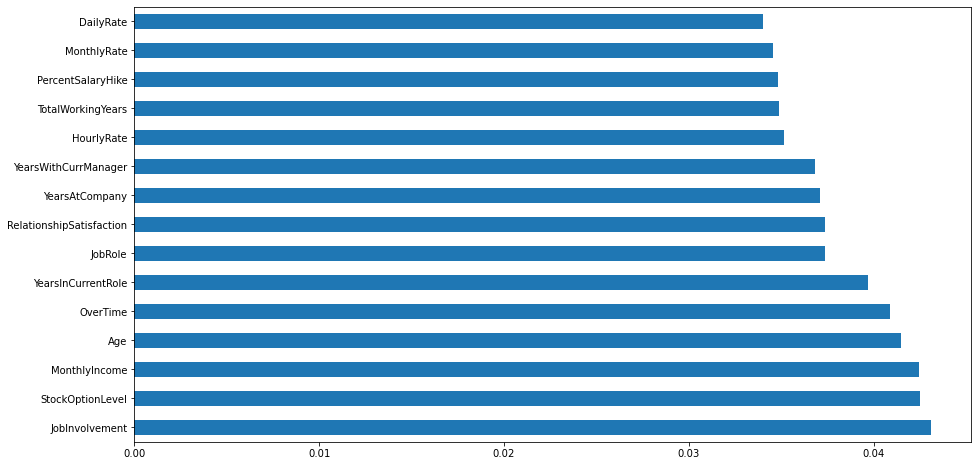

In [65]:
plt.figure(figsize=(15,8))
plot_feat_imp = pd.Series(val_feat_imp,index=x.columns)

plot_feat_imp.nlargest(15).plot(kind='barh')
plt.show()

### Splliting the Data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\VibeX\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# Before scaling the features
pred = log_reg.predict(X_test)
Acc_score= accuracy_score(pred,y_test)

print('Accuracy score for Logistic Regression model is: ',round(Acc_score*100,2))

print("Mean squared error for Logistic Regression model is: ",mean_squared_error(y_test,pred))

# accuracy-> 88% , mse-> 0.11

Accuracy score for Logistic Regression model is:  88.57
Mean squared error for Logistic Regression model is:  0.11428571428571428


"score" is a general term for a model's performance on a given task, 
"accuracy_score" is a specific evaluation metric used for classification tasks to measure the percentage of correctly predicted labels out of all the labels in the dataset.

In [71]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x_scaled = minmax.fit(x).transform(x)

In [72]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled= train_test_split(x_scaled,y,random_state=20,test_size=25)

In [73]:
# After scaling the features
log_reg.fit(X_train_scaled,y_train_scaled)
pred_scaled = log_reg.predict(X_test_scaled)

acc_score=accuracy_score(pred_scaled,y_test_scaled)

print('Accuracy score for Logistic Regression model is: ',round(acc_score*100,2))

print("Mean squared error for Logistic Regression model is: ",mean_squared_error(y_test_scaled,pred_scaled))

# accuracy-> 84% , mse-> 0.16

Accuracy score for Logistic Regression model is:  84.0
Mean squared error for Logistic Regression model is:  0.16


In [74]:
## Scaling is decreasing the accuracy

## XGBoost

In [75]:
from xgboost import XGBClassifier

In [76]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
pred= xgb.predict(X_test)
acc_score = accuracy_score(pred,y_test)

print('Accuracy score for model is: ',round(acc_score*100,2))
print("Mean squared error for XGBoost Classifier model is: ",mean_squared_error(y_test,pred))

# accuracy-> 88% , mse-> 0.12

Accuracy score for model is:  87.38
Mean squared error for XGBoost Classifier model is:  0.1261904761904762


In [78]:
# After scaling the features
xgb.fit(X_train_scaled,y_train_scaled)
pred_scaled = xgb.predict(X_test_scaled)

acc_score=accuracy_score(pred_scaled,y_test_scaled)

print('Accuracy score for XGBoost Classifier model is: ',round(acc_score*100,2))

print("Mean squared error for XGBoost Classifier model is: ",mean_squared_error(y_test_scaled,pred_scaled))

# accuracy-> 88% , mse-> 0.12

Accuracy score for XGBoost Classifier model is:  88.0
Mean squared error for XGBoost Classifier model is:  0.12


In [79]:
# No major changed observed in XGB calssifier

# Hyperparameter Tunning

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
params= {'n_estimators': [int(x) for x in np.linspace(start = 100,stop=1000,num=20)],
         'max_depth':[int(x) for x in np.linspace(5, 20, num = 6)],
         'learning_rate':[0.001,0.003,0.005,0.008,0.010,0.015],
         'colsample_bytree':[0.01,0.05,0.10,0.15,0.20],
         'reg_alpha': [0.001,0.005,0.010,0.015,0.020],  
         'min_child_weight' : list(range(1,10))
}
print(params)
# n_estimators -> No of trees
# max_depth -> Max depth of each decision tree
# colsample_bytree -> Fraction of columns randomly selected for each tree, Reduces overfitting
# Reg_alpha-> used for regularization (L1)
# min_child_weight -> min no of samples required in each leaf node

{'n_estimators': [100, 147, 194, 242, 289, 336, 384, 431, 478, 526, 573, 621, 668, 715, 763, 810, 857, 905, 952, 1000], 'max_depth': [5, 8, 11, 14, 17, 20], 'learning_rate': [0.001, 0.003, 0.005, 0.008, 0.01, 0.015], 'colsample_bytree': [0.01, 0.05, 0.1, 0.15, 0.2], 'reg_alpha': [0.001, 0.005, 0.01, 0.015, 0.02], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [82]:
xgb_random = RandomizedSearchCV(estimator = xgb ,param_distributions=params,cv=10,
                                verbose=2,random_state=42,n_jobs=1,scoring="accuracy")

In [83]:
# scaled data
xgb_random.fit(X_train_scaled,y_train_scaled)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.5s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.5s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.5s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.3s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.3s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimator

[CV] END colsample_bytree=0.15, learning_rate=0.005, max_depth=11, min_child_weight=5, n_estimators=715, reg_alpha=0.015; total time=   0.5s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30...
                   param_distributions={'colsample_bytree': [0.01, 0.05, 0.1,
                                                            

In [84]:
# Scaled data
predict=xgb_random.predict(X_test_scaled)
acc_score = accuracy_score(y_test_scaled,predict)

print('Accuracy score for XGBoost Classifier model is: ',round(acc_score*100,2))

print("Mean squared error for XGBoost Classifier model is: ",mean_squared_error(y_test_scaled,predict))

# accuracy-> 80% , mse-> 0.2

Accuracy score for XGBoost Classifier model is:  80.0
Mean squared error for XGBoost Classifier model is:  0.2


In [85]:

print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8874078130704636
best_params: 
 {'reg_alpha': 0.015, 'n_estimators': 621, 'min_child_weight': 5, 'max_depth': 14, 'learning_rate': 0.01, 'colsample_bytree': 0.15}


In [86]:
# Not scaled data
xgb_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimators=621, reg_alpha=0.015; total time=   0.4s
[CV] END colsample_bytree=0.15, learning_rate=0.01, max_depth=14, min_child_weight=5, n_estimator

[CV] END colsample_bytree=0.15, learning_rate=0.005, max_depth=11, min_child_weight=5, n_estimators=715, reg_alpha=0.015; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree=0.05, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=905, reg_alpha=0.005; total time=   0.3s
[CV] END colsample_bytree

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30...
                   param_distributions={'colsample_bytree': [0.01, 0.05, 0.1,
                                                            

In [87]:
predict=xgb_random.predict(X_test)
acc_score = accuracy_score(y_test,predict)

print('Accuracy score for XGBoost Classifier model is: ',round(acc_score*100,2))

print("Mean squared error for XGBoost Classifier model is: ",mean_squared_error(y_test,predict))

# accuracy -> 89% , mse-> 0.10

Accuracy score for XGBoost Classifier model is:  89.29
Mean squared error for XGBoost Classifier model is:  0.10714285714285714


In [88]:
print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8854349206349206
best_params: 
 {'reg_alpha': 0.015, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.1}


# Confusion Matrix

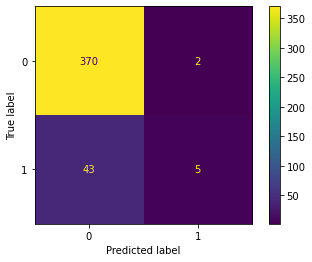

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# calculate confusion matrix
cm = confusion_matrix(y_test,predict)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [90]:
# 370 + 5 -> corretly predicted
# 43 + 2 -> incorrectly predicted
incorrect_pred=(45/375)*100
print(f"incorrect prediction {incorrect_pred} %")
print(f"Correct prediction {100-incorrect_pred}" )

# 88%

incorrect prediction 12.0 %
Correct prediction 88.0


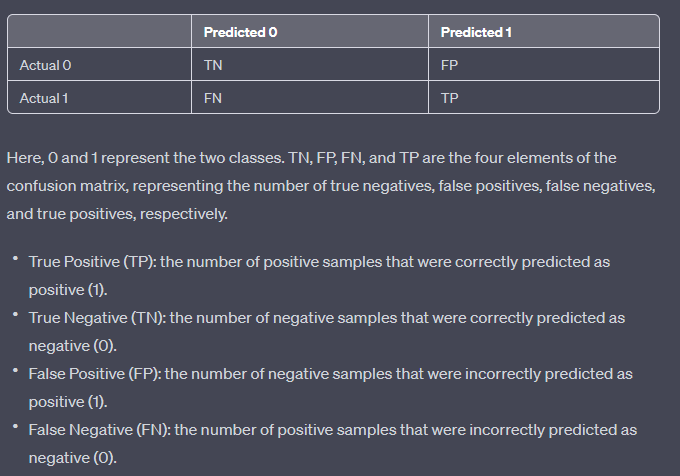

# Neural Network

In [91]:
import tensorflow as tf
from keras import layers

In [92]:
tf.keras.utils.set_random_seed(42)

model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"] )

model1.fit(x,y, epochs=5)

Epoch 1/5
53/53 [==============================] - 1s 2ms/step - loss: 2.4573 - accuracy: 0.8402
Epoch 2/5
53/53 [==============================] - 0s 1ms/step - loss: 2.4573 - accuracy: 0.8402
Epoch 3/5
53/53 [==============================] - 0s 1ms/step - loss: 2.4573 - accuracy: 0.8402
Epoch 4/5
53/53 [==============================] - 0s 1ms/step - loss: 2.4573 - accuracy: 0.8402
Epoch 5/5
53/53 [==============================] - 0s 2ms/step - loss: 2.4573 - accuracy: 0.8402


In [93]:
tf.keras.utils.set_random_seed(42)
model1 = tf.keras.Sequential([tf.keras.layers.Dense(5)])   # Adding 5 neurons to first Hidden Layer(HL)

model1.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.SGD() ,
              metrics=['accuracy'])

model1.fit(x,y,epochs=5)

Epoch 1/5
53/53 [==============================] - 1s 1ms/step - loss: 4.3469 - accuracy: 0.1193
Epoch 2/5
53/53 [==============================] - 0s 1ms/step - loss: 4.3268 - accuracy: 0.1193
Epoch 3/5
53/53 [==============================] - 0s 2ms/step - loss: 4.3268 - accuracy: 0.1193
Epoch 4/5
53/53 [==============================] - 0s 1ms/step - loss: 4.3268 - accuracy: 0.1193
Epoch 5/5
53/53 [==============================] - 0s 1ms/step - loss: 4.3268 - accuracy: 0.1193


In [94]:
# Changign model architecture -> Adding more layers, adding activation function

tf.keras.utils.set_random_seed(42)
model1 = tf.keras.Sequential([tf.keras.layers.Dense(30),   # Adding 30 neurons to first Input Layer(IL)
                             tf.keras.layers.Dense(15)])   # Adding 15 neurons to first Hidden Layer(HL)

model1.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.SGD() ,
              metrics=['accuracy'])

model1.fit(x,y,epochs=50)

Epoch 1/50
53/53 [==============================] - 1s 1ms/step - loss: 8.1231 - accuracy: 0.0912
Epoch 2/50
53/53 [==============================] - 0s 1ms/step - loss: 8.1335 - accuracy: 0.8706
Epoch 3/50
53/53 [==============================] - 0s 1ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 9/50
53/53 [==============================] - 0s 2ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 10/50
53/53 [==============================] - 0s 1ms/step - loss: 8.1262 - accuracy: 0.8706
Epoch 11/50
53/53 [

In [95]:
# Changign model architecture -> Adding more layers, adding activation function

tf.keras.utils.set_random_seed(42)
model1 = tf.keras.Sequential([tf.keras.layers.Dense(1,activation = 'sigmoid'),  # Adding sigmoid activation function
                             tf.keras.layers.Dense(30),
                             tf.keras.layers.Dense(1)])  

model1.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , # Changing optimizer to Adam with learning rate
              metrics=['accuracy'])

model1.fit(X_train,y_train,epochs=50)

Epoch 1/50
40/40 [==============================] - 1s 2ms/step - loss: 1.8292 - accuracy: 0.8791
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 1.8652 - accuracy: 0.8791
Epoch 11/50
40/40 [

In [96]:
# Changign model architecture -> Adding more layers, adding activation function
# Imported layers 
# Adding dropout

tf.keras.utils.set_random_seed(42)
model2 = tf.keras.Sequential([layers.Dense(2,activation = 'relu'),
                              layers.Dropout(0.02),
                             layers.Dense(30),
                              layers.Dropout(0.02),
                             layers.Dense(15),
                               layers.Dropout(0.02),
                             layers.Dense(1,activation = 'sigmoid')])  

model2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.Adam() , 
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 65.4038 - accuracy: 0.7534
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 25.1653 - accuracy: 0.8441
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 13.6503 - accuracy: 0.8313
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 15.8679 - accuracy: 0.8369
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 14.6752 - accuracy: 0.8282
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 10.4743 - accuracy: 0.8433
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 9.1067 - accuracy: 0.8481
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 7.7396 - accuracy: 0.8584
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 5.8602 - accuracy: 0.8576
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 3.8646 - accuracy: 0.8528
Epo

Epoch 83/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8791
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8791
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8791
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8791
Epoch 87/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8791
Epoch 88/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8791
Epoch 89/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8791
Epoch 90/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8775
Epoch 91/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8791
Epoch 92/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8791


In [97]:
# Changign model architecture -> Adding more layers, adding activation function
# Imported layers 
# Adding dropout
# Batch size

tf.keras.utils.set_random_seed(42)
model2 = tf.keras.Sequential([layers.Dense(2,activation = 'relu'),
                              layers.Dropout(0.02),
                             layers.Dense(30),
                              layers.Dropout(0.02),
                             layers.Dense(15),
                               layers.Dropout(0.02),
                             layers.Dense(1,activation = 'sigmoid')])  

model2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.Adam() , 
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 83.5182 - accuracy: 0.6794
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 36.9865 - accuracy: 0.8656
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 24.7515 - accuracy: 0.8409
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 17.8012 - accuracy: 0.8298
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 18.8966 - accuracy: 0.8321
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 14.2915 - accuracy: 0.8449
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 14.5134 - accuracy: 0.8321
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 11.8260 - accuracy: 0.8449
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 9.4449 - accuracy: 0.8441
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 10.3561 - accuracy: 0.8465


26/26 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8767
Epoch 83/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8783
Epoch 84/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8783
Epoch 85/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8783
Epoch 86/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8783
Epoch 87/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8783
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8791
Epoch 89/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8791
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8791
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8791
Epoch 92/100


In [98]:
# Changign model architecture -> Adding more layers, adding activation function
# Imported layers 
# Adding dropout
# Batch size
# Validation split

tf.keras.utils.set_random_seed(42)
model2 = tf.keras.Sequential([layers.Dense(2,activation = 'relu'),
                              layers.Dropout(0.02),
                             layers.Dense(30),
                              layers.Dropout(0.02),
                             layers.Dense(15),
                               layers.Dropout(0.02),
                             layers.Dense(1,activation = 'sigmoid')])  

model2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.Adam() , 
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 2s 15ms/step - loss: 114.3218 - accuracy: 0.6109 - val_loss: 29.5956 - val_accuracy: 0.8810
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 40.6125 - accuracy: 0.8617 - val_loss: 23.4321 - val_accuracy: 0.8810
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 25.2168 - accuracy: 0.8567 - val_loss: 12.0782 - val_accuracy: 0.8810
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 19.2026 - accuracy: 0.8289 - val_loss: 7.6395 - val_accuracy: 0.8810
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 19.2519 - accuracy: 0.8159 - val_loss: 5.2551 - val_accuracy: 0.8810
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 19.5568 - accuracy: 0.8149 - val_loss: 5.7822 - val_accuracy: 0.8810
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 14.8009 - accuracy: 0.8328 - val_loss: 6.5662 - val_accuracy: 0.8810
E

21/21 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.8766 - val_loss: 0.3776 - val_accuracy: 0.8810
Epoch 59/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9004 - accuracy: 0.8776 - val_loss: 0.3731 - val_accuracy: 0.8810
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.8756 - val_loss: 0.3690 - val_accuracy: 0.8810
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.8786 - val_loss: 0.3650 - val_accuracy: 0.8810
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.8766 - val_loss: 0.3614 - val_accuracy: 0.8810
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8756 - val_loss: 0.3591 - val_accuracy: 0.8810
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7449 - accuracy: 0.8746 - val_loss: 0.3594 - val_accuracy: 0.8810
Epoch 65/100
21/21 

In [99]:
# Changign model architecture -> Adding more layers, adding activation function
# Imported layers 
# Adding dropout
# Batch size
# Validation split
# Early stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10,verbose=1) # changing patience to 10

tf.keras.utils.set_random_seed(42)
model2 = tf.keras.Sequential([layers.Dense(2,activation = 'relu'),
                              layers.Dropout(0.02),
                             layers.Dense(30),
                              layers.Dropout(0.02),
                             layers.Dense(15),
                               layers.Dropout(0.02),
                             layers.Dense(1,activation = 'sigmoid')])  

model2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.Adam() , 
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=50,validation_split=0.2,callbacks=early_stop)

Epoch 1/100
21/21 [==============================] - 2s 13ms/step - loss: 114.3218 - accuracy: 0.6109 - val_loss: 29.5956 - val_accuracy: 0.8810
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 40.6125 - accuracy: 0.8617 - val_loss: 23.4321 - val_accuracy: 0.8810
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 25.2168 - accuracy: 0.8567 - val_loss: 12.0782 - val_accuracy: 0.8810
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 19.2026 - accuracy: 0.8289 - val_loss: 7.6395 - val_accuracy: 0.8810
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 19.2519 - accuracy: 0.8159 - val_loss: 5.2551 - val_accuracy: 0.8810
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 19.5568 - accuracy: 0.8149 - val_loss: 5.7822 - val_accuracy: 0.8810
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 14.8009 - accuracy: 0.8328 - val_loss: 6.5662 - val_accuracy: 0.8810
E

21/21 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.8766 - val_loss: 0.3776 - val_accuracy: 0.8810
Epoch 59/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9004 - accuracy: 0.8776 - val_loss: 0.3731 - val_accuracy: 0.8810
Epoch 60/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.8756 - val_loss: 0.3690 - val_accuracy: 0.8810
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.8786 - val_loss: 0.3650 - val_accuracy: 0.8810
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.8766 - val_loss: 0.3614 - val_accuracy: 0.8810
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8756 - val_loss: 0.3591 - val_accuracy: 0.8810
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7449 - accuracy: 0.8746 - val_loss: 0.3594 - val_accuracy: 0.8810
Epoch 65/100
21/21 

In [100]:
# Changign model architecture -> Adding more layers, adding activation function
# Imported layers 
# Adding dropout
# Batch size
# Validation split
# Early stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1)

tf.keras.utils.set_random_seed(42)
model2 = tf.keras.Sequential([layers.Dense(2,activation = 'relu'),          # adding one more layer and removing 2 dropouts
                              layers.Dropout(0.02),
                             layers.Dense(30),
#                              layers.Dropout(0.02),
                              layers.Dense(20),
                              layers.Dropout(0.02),
                             layers.Dense(15),
#                               layers.Dropout(0.02),
                             layers.Dense(1,activation = 'sigmoid')])  

model2.compile(loss=tf.keras.losses.BinaryCrossentropy() ,
              optimizer=tf.keras.optimizers.SGD() ,                       # Changing optimizer to SGD
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=50,validation_split=0.2,callbacks=early_stop)

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 2.4470 - accuracy: 0.8428 - val_loss: 0.3751 - val_accuracy: 0.8810
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8786 - val_loss: 0.3651 - val_accuracy: 0.8810
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.8786 - val_loss: 0.3652 - val_accuracy: 0.8810
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8786 - val_loss: 0.3650 - val_accuracy: 0.8810
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8786 - val_loss: 0.3652 - val_accuracy: 0.8810
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8786 - val_loss: 0.3651 - val_accuracy: 0.8810
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8786 - val_loss: 0.3651 - val_accuracy: 0.8810
Epoch 8/100


In [101]:
model2.evaluate(X_test,y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8857


[0.3554469645023346, 0.8857142925262451]

In [102]:
model2.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 2)                 62        
                                                                 
 dropout_12 (Dropout)        (None, 2)                 0         
                                                                 
 dense_24 (Dense)            (None, 30)                90        
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_26 (Dense)            (None, 15)                315       
                                                                 
 dense_27 (Dense)            (None, 1)                

14/14 [==============================] - 0s 1ms/step


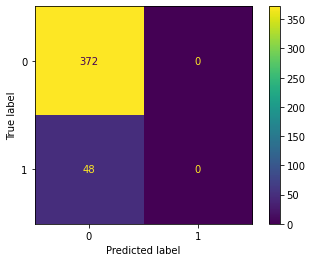

In [103]:
pred = model2.predict(X_test)

cm=confusion_matrix(y_test,tf.round(pred))   # Rounding off the predicted values

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()